Linear Regression
====
_Leo Lu_

Here we will discuss on our first supervised learning algorithm, _Linear Regression_. And I'll give the detailed process of formula derivation so it may be boring to some extent and the knowledge of linear algebra and a little calculus will be helpful for understanding. There is a button used to 'hide' or 'unhide' code lower right for you.

I'm sorry about that the pictures and tables will all be on the left side if you choose to hide the cells of codes which may make the notebook look a bit strange. So any instruction or suggestion of solution to this problem will help me a lot.

In [2]:
# This part is used to make the buttom work properly and 
# it's not related to the main topic.
# Please don't change anything in this cell. 
import warnings
warnings.filterwarnings(action='ignore')

%load_ext autoreload
%autoreload 2

from IPython.display import display_html
display_html("""
<div style="text-align:right; margin: 0px 0;">
<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Hide&Unhide Code</button>
<hr/>
</div>
""", raw=True)

Hide&Unhide Code

>Let's start with the famous _Portland Sale Price_ dataset. We see there are three columns in it. <br>
* Size - the area of the house
* Bedrooms - the number of bedrooms in the house
* Price - Sale price

>This kind of dataset is often used for the predicting task. We want to predict something, for example the house sale price, based on the information already in hand or collected from Internet or other sources. In this case, we have 47 samples of sale price data in portland consisting of size of the house, the number of bedrooms and the sale price of the house. 

In [1]:
import pandas as pd
import numpy as np

portland = pd.read_table('./datasets/portland.txt', header=None, names=['Size', 'Bedrooms', 'Price'], sep=',')
portland.head(10)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


>Let's give it a shot in a simple way. Here we're going to slove the problem if we know the space area of a house in Portland, how much should we pay? So the relationship between _'Size'_ and _'Price'_ is what we want to learn. First just take a look at the scatter diagram.

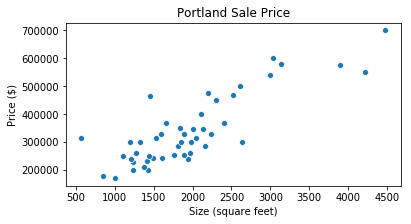

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.figure(figsize=(6,3))
sns.scatterplot(x='Size',y='Price',data=portland)
plt.title('Portland Sale Price')
plt.xlabel('Size (square feet)')
plt.ylabel('Price (\$)')

>It seems from the diagram that there is a linear relationship between these two variables. That means we may find a formula in the form of $price=\theta \times Size+b$ to approximately express the relation, where $\theta$ and $b$ are the parameters we are interested in.

>You see, what we are trying to do is to find out the relationship among what we have got in hand and then make prediction to one of the variables based on the information we have learnt. Such problem is called _Regression Problem_. Most of  the time, we name the variable _'Size'_ as _Independent Variable_ or _Feature_ and _'Price'_ as _Dependent Variable_ or _Target_. If there is a linear relationship between independent variable and dependent variable, we call such kind of regression problem _Linear Regression_. If only 1 independent variable is provided, we call it _Simple Linear Regression_. If there are more than 1 independent variables,  we call it _Multiple Linear Regression_. In majority of cases, we have only 1 dependent variable.

>We know that _'Price'_ can be expressed by _'Size'_ in the form of $y=\theta x+b$. Now our task is to find out the values of $\theta$ and $b$. I think most of us have learnt how to solve linear equations and we can give out a series of certain solutions after we put the values into the equation and use [Cramer's rule](https://en.wikipedia.org/wiki/Cramer%27s_rule) or [Gaussian Elimination](https://en.wikipedia.org/wiki/Gaussian_elimination) to work out the results. However, I'm afraid this doesn't work in this situation.

>Let's see what will happen if we just put the values we catch from the datasets into the equation substituting the x and y.

$$399900=\theta \times2104+b$$
$$329900=\theta \times1600+b$$
$$369000=\theta \times2400+b$$
$$……$$

>Obivously, we cannot give out the definite numerical solution of this problem. This is a matter of course because these points of samples actually are not in a single line. Therefore, the conventional methods of solving the equations are surely not effective. Then how can we slove the problem?

>[Adrien-Marie Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre), a famous French mathematician told us the answer in one of his paper in 1805. He didn't spend most of energy to find out the definite numerical slolutions. Instead he gave out another thought to looking for the overall balance of errors. And then he introduced the Regular Equations and the famous [Least Square Method](https://en.wikipedia.org/wiki/Least_squares).  

>ALERT!!! Now we are beginning to see some necessary mathematic formulas. So I'll introduce some notations first.

>* $n$:  the rows of sample dataset or the number of training examples<br>
* $m$:  the columns of sample dataset or the number of features<br>
* $x$:  independent values or features<br>
* $x_i$:  the $i^{th}$ independent variable(s) or feature<br>
* $y$:  dependent variable or target<br>
* $(x, y)$:  one row of dataset or one training sample<br>
* $(x^{(i)},y^{(i)})$: $i^{th}$ row of dataset or training sample

>For example, $x^{(4)}$ means the fourth training sample. In Portland datasets, it represents the fourth size 1416 when we are discussing on the simple linear regreesion. And pay attention when we have more than 1 independent like if we add _Bedrooms_ into our regression, $x^{(4)}$ is (1416, 2).<br>
$x_1$ is the whole first column of dataset so it's just like a vector. Now we can easily write out $x_1^{(2)}$ is 1600 based on the notations as well.

>OK! Now we go back to the regression problem. In Adrien-Marie Legendre's throught, we can transform the question of calculating the solution to such task: find the parameters ($\theta$,$b$) that minimize the following formula.
$$\sum_{i=1}^n(f(x^{(i)})-y^{(i)})^2$$
Here $f$ means the formula we want to find out and $f(x^{(i)})$ is the ith prediction based on the $x^{(i)}$ and the formula.

>So we can express our problem in another way.$$J(\theta,b)=\frac{1}{2n}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})^2$$
Our target is to look for the proper $\theta$ and $b$ that minimize $J(\theta,b)$.

>This is quite an innovative thought at that time and it is a more statistical solution because Legendre focused on reducing the errors between the ground truth and the prediction so that we can fit an approximately correct line instead of an absolutely accurate one. It's true if we have the minimal error, our line is the closest to the real one. 

>$J(\theta,b)$ is called loss function and it is structed by the least mean square thought. First calculate the sum of the square of the difference between $f(x^{(i)})$ and $y^{(i)}$. Then multiply the result by $\frac{1}{2n}$. The reason why we calculate the square of each sample is to eliminate the effects of positive and negative signs. $\frac{1}{n}$ is for the average and $\frac{1}{2}$ can make the following calculation easier.

>The process we look for the proper $\theta$ and $b$ to minimize $J(\theta,b)$ is optimization. The method or algorithm we apply into solving the problem is called optimizer. The most common optimizer is [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) method.

>We won't spend much time on the theory of gradient descent here. And you can find more details when we are talking about nerual network in another notebook in this project. Here we can just see the steps about how it works based on [chain rule](https://en.wikipedia.org/wiki/Chain_rule).

<center>If $F(x)=f(g(x))$ for all $x$, then $F^{'}(x)=f^{'}(g(x))g^{'}(x)$, while all fuctions can be derived.</center>

>Now we can write down our target function or more definitely loss function. And we are aimed to find $\theta$ and $b$ that minimize the function or we can say to find the minimum value of this function with the two unkown parameters. So what we should do now is to take a small step towards the minimum point of this function. And the fastest direction is along the gradient of current location. So we need to calculate the derivation of each parameter and update all parameters with the gradient. Maybe this is not easy to understand at once. Just put it aside, we will see it soon in later notebook. Here we just give it a shot to learn how it works.

![GD](https://raw.githubusercontent.com/RonaldLeoLu/images_for_md/master/CS229/gradient_descent.png)

>So our formula for this problem is $y=\theta x+b$ and our loss function is $J(\theta,b)$. Let's start with the initial value of parameters: $\theta=1$ and $b=0$. And we'll keep updating the parameters to reduce $J(\theta,b)$ with the following rules.

<center>
$$\theta:=\theta-\alpha\frac{\partial J}{\partial\theta}$$<br>
$$b:=b-\alpha\frac{\partial J}{\partial b}$$
</center>

>So we can easily to tell that in multiple linear regression problems we would have the formula in this form:$$y=\sum^{m}_{i=1}\theta_ix_i+b$$

>And our update rules is just like that in simple linear regression.

$$\theta_i:=\theta_i-\alpha\frac{\partial J}{\partial\theta_i}$$<br>
$$b:=b-\alpha\frac{\partial J}{\partial b}$$

>Here $\alpha$ is called learning rate which controls our pace towards the minimun point. Either too small or big learning rate may cause the consequence that we go too slow or too fast and miss the destination. Next problem is to calculate the derivations.

$$
\begin{split}
f(x^{(i)})&=\sum^{m}_{j=1}\theta_j x^{(i)}_j+b \\
J(\theta_1,...,\theta_n,b)&=\frac{1}{2n}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})^2 \\
\\
\frac{\partial J}{\partial\theta_j}&=\frac{1}{2n}\frac{\partial}{\partial\theta_j}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})^2 \\
&=\frac{1}{n}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})\frac{\partial}{\partial\theta_j}(f(x^{(i)})-y^{(i)}) \\
&=\frac{1}{n}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})x^{(i)}_j \\
\\
\frac{\partial J}{\partial b}&=\frac{1}{2n}\frac{\partial}{\partial b}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})^2 \\
&=\frac{1}{n}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})\frac{\partial}{\partial b}(f(x^{(i)})-y^{(i)}) \\
&=\frac{1}{n}\sum_{i=1}^n(f(x^{(i)})-y^{(i)})
\end{split}
$$

>Some supplement about the formulas above.

$$
\begin{split}
\frac{\partial}{\partial\theta_j}(f(x^{(i)})-y^{(i)})&=\frac{\partial}{\partial\theta_j}(\sum_{k=1}^{m}\theta_kx^{(i)}_k+b-y^{(i)}) \\
&=x^{(i)}_j \\
\\
\frac{\partial}{\partial b}(f(x^{(i)})-y^{(i)})&=\frac{\partial}{\partial b}(\sum_{k=1}^{m}\theta_kx^{(i)}_k+b-y^{(i)}) \\
&= 1
\end{split}
$$

>So this is a gradient descent way to optimize the parameters and it's also a most popular optimization method in many other algorithms such as logistic regression and back propogation. However, sometimes we have another common method to solve such problems in a matrix form called ordinary least square method which is actually the 'standard' solution on linear regression.

>First we need to do some necessary transformation. See that, let $x_0^{(i)}=1$ and $\theta_0=b$ and rewirte our formula in the following way.

$$
\begin{split}
f(x^{(i)})&=\sum^{m}_{j=1}\theta_jx^{(i)}_j+x_0^{(i)}b \\
&=\sum^{m}_{j=0}\theta_jx^{(i)}_j 
\end{split}
$$

>We denote $X$ as the whole dataset and $\theta$ as a vector of $(\theta_0, ... ,\theta_m)^T$. Now we can have the formula in this new form.

$$f(X)=X\theta$$

>Then we denote $y$ as a vector of $(y^{(1)},...,y^{(n)})^T$ and rewrite the loss function in this way.

$$J(\theta)=\frac{1}{2n}(X\theta-y)^T(X\theta-y)$$

>As we all know, our target is to find $\theta$ that minimizes $J(\theta)$ or we can say we need to find $\theta$ that makes $\frac{\partial J(\theta)}{\partial\theta}$ equals 0.

$$
\begin{split}
\frac{\partial J(\theta)}{\partial\theta}&=\frac{1}{2n}\frac{\partial}{\partial\theta}(X\theta-y)^T(X\theta-y) \\
&=\frac{1}{2n}\frac{\partial}{\partial\theta}(\theta^TX^T-y^T)(X\theta-y) \\
&=\frac{1}{2n}\frac{\partial}{\partial\theta}(\theta^TX^TX\theta-y^TX\theta-\theta^TX^Ty+y^Ty)
\end{split}
$$

>We have the fact that $$\frac{\partial x^T\alpha}{\partial x}=\frac{\partial\alpha^Tx}{\partial x}=\alpha$$
And obviously $y^Ty$ has no relation to $\theta$, so $$\frac{\partial}{\partial\theta}y^Ty=0$$ Then the derivation can be calculated in the following way.

$$
\begin{split}
\frac{\partial J}{\partial\theta}&=\frac{1}{2n}(X^TX\theta+X^TX\theta-X^Ty-X^Ty) \\
&=\frac{1}{n}(X^TX\theta-X^Ty)
\end{split}
$$

>Since there is the target $\frac{\partial J(\theta)}{\partial\theta}=0$, we can get the following equation. $$X^TX\theta=X^Ty$$
From this equation, we will have the least square estimate of parameter $\theta$ $$\hat\theta=(X^TX)^{-1}X^Ty$$
Finally we have got the proper parameter through a different way.

>Ok, in my view these are the two most common method to solve such linear regression problems. However, we may be aware of a problem of the second method that the X, our dataset should be invertible. In another notebook we will discuss on this problem. Although it's less accurate, I prefer Gradient Descent to Ordinary Least Square method because the cost of huge matrix calculation will become more expensive with the size of dataset getting larger. Next we will take action to apply our algorithm into real dataset. 

>Here I have realize the linear regression in three different ways. First I used the LinearRegression function created by the package called scikit-learn, a famous python package including lots of machine learning algorithm. Second I used ordinary least square method and third stochastic gradient descent to calculate the parameters. The codes of the latter two methods can be found in the folder _scripts_.

In [4]:
from sklearn.linear_model import LinearRegression
from scripts import LinearRegressor

# Simple data prerocessing ----- normalization
portland1 = portland.copy(deep=True)
portland1.Size = (portland1['Size'] - portland1['Size'].mean()) / portland1['Size'].std()
portland1.Bedrooms = (portland1['Bedrooms'] - portland1['Bedrooms'].mean()) / portland1['Bedrooms'].std()

# function to show the results and data visualization
def show_results(x, y):
    # keep the parameters
    cache = {}
    # linear regression designed by sklearn
    lr = LinearRegression()
    lr.fit(x, y)
    # linear regression by myself using ols method
    lr1 = LinearRegressor(optimizer='ols')
    lr1.fit(x, y)
    # linear regression by myself using sgd
    lr2 = LinearRegressor(max_iter=2500,batch_size=15,optimizer='sgd',learning_rate=4e-3)
    lr2.fit(x, y)

    print('Coefficients by Sklearn.LinearRegression:\n','W:',lr.coef_,'b:',lr.intercept_)
    cache['sklearn'] = (lr.coef_, lr.intercept_)
    w1,b1 = lr1.coef()
    cache['ols'] = (w1, b1)
    print('Coefficients by OLS method:\n','W:',w1,'b:',b1)
    w2,b2 = lr2.coef()
    cache['sgd'] = (w2, b2)
    print('Coefficients by SGD method:\n','W:',w2,'b:',b2)
    print('-'*20)

    a1 = lr.predict(x)
    a2 = lr1.predict(x)
    a3 = lr2.predict(x)

    from sklearn.metrics import mean_squared_error
    e1 = mean_squared_error(a1,y)
    e2 = mean_squared_error(a2,y)
    e3 = mean_squared_error(a3,y)

    print('MSE by Sklearn.LinearRegression:',e1)
    print('MSE by OLS method:',e2)
    print('MSE by SGD method:',e3)

    # Visualization
    vls = lr2.scores
    plt.plot(list(range(len(vls))),vls)
    plt.title('Loss_Iteration by SGD')
    plt.xlabel('Iteration times')
    plt.ylabel('Loss')
    
    return cache

>Before we begin our work, the dataset should be preprocessed in order to make our predicting more accurate and then we will take a look at the new scatter plot.

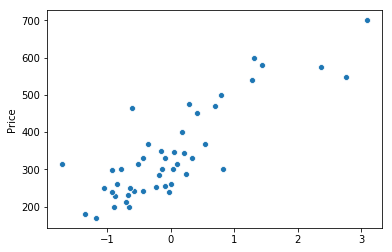

In [10]:
sns.scatterplot(portland1.Size.values, portland1.Price / 1000)

>Here we will see the result of a simple linear regression. We just use the variable _Size_ to predict our sale price.

Coefficients by Sklearn.LinearRegression:
 W: [105.40142746] b: 340.4126595744681
Coefficients by OLS method:
 W: [105.40142746177929] b: [340.412659574468]
Coefficients by SGD method:
 W: [105.98712151487888] b: [340.4185787340334]
--------------------
MSE by Sklearn.LinearRegression: 4429.228012115747
MSE by OLS method: 4429.228012115749
MSE by SGD method: 4429.563786005315


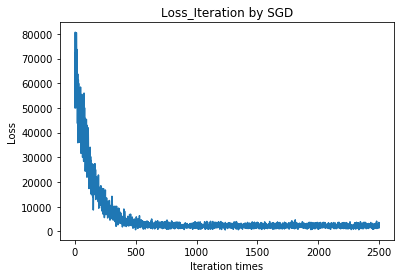

In [5]:
x1 = portland1['Size'].values.reshape(-1,1)
y1 = portland1['Price'].values / 1000.0
# simple linear regression
cache1 = show_results(x1, y1)

>And let's see the result in plot.

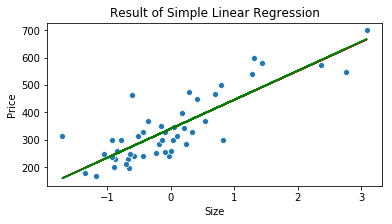

In [12]:
w0, b0 = cache1['sklearn']
w1, b1 = cache1['ols']
w2, b2 = cache1['sgd']

y0 = x1.dot(w0) + b0
y1 = x1.dot(w1) + b1
y2 = x1.dot(w2) + b2

ax = plt.figure(figsize=(6,3))
sns.scatterplot(portland1.Size.values, portland1.Price / 1000)
plt.plot(x1, y0, 'b')
plt.plot(x1, y1, 'r')
plt.plot(x1, y2, 'g')
plt.title('Result of Simple Linear Regression')
plt.xlabel('Size')

>Here we will see the result of a multiple linear regression. We use all the variables to predict our sale price.

Coefficients by Sklearn.LinearRegression:
 W: [102.84846581   5.24562968] b: 340.4126595744681
Coefficients by OLS method:
 W: [102.84846581213472, 5.245629677249634] b: [340.412659574468]
Coefficients by SGD method:
 W: [101.48182810577505, 5.793555392042875] b: [339.4124302409992]
--------------------
MSE by Sklearn.LinearRegression: 4408.675782196404
MSE by OLS method: 4408.675782196403
MSE by SGD method: 4411.084671278687


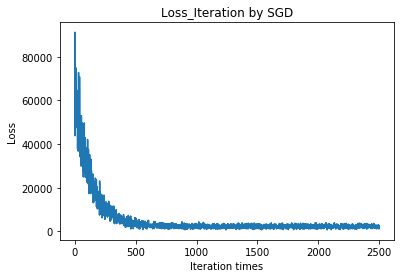

In [14]:
x2 = portland1[['Size','Bedrooms']].values
y2 = portland1['Price'].values / 1000.0
# multip linear regression
cache2 = show_results(x2, y2)

>Also we will take a look at the result.

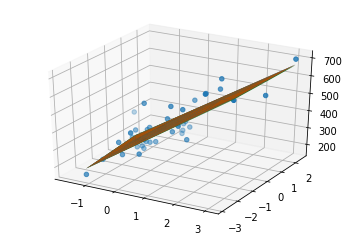

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

W0, B0 = cache2['sklearn']
W1, B1 = cache2['ols']
W2, B2 = cache2['sgd']

Y0 = x2.dot(W0) + B0
Y1 = x2.dot(W1) + B1
Y2 = x2.dot(W2) + B2

a1 = portland1.Size.values
a2 = portland1.Bedrooms.values
a3 = y2

ax.scatter3D(a1,a2,a3)
ax.plot_trisurf(a1,a2,Y0)
ax.plot_trisurf(a1,a2,Y1)
ax.plot_trisurf(a1,a2,Y2)

>Yeah! All the methods work successfully and they almost get the same parameters. The sgd optimizer gets a little different result from the the other two but it's still acceptable and if we keep fine-tuning the hyper parameters or expand the size of our dataset, the result will be much closer.